In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()


,Unnamed: 0,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              48842 non-null  int64
 1   fnlwgt            48842 non-null  int64
 2   educacion         48842 non-null  int64
 3   educacion_num     48842 non-null  int64
 4   estado_civil      48842 non-null  int64
 5   relacion          48842 non-null  int64
 6   ocupacion         48842 non-null  int64
 7   raza              48842 non-null  int64
 8   genero            48842 non-null  int64
 9   ganancia-capital  48842 non-null  int64
 10  perdida-capital   48842 non-null  int64
 11  horas_semana      48842 non-null  int64
 12  pais              48842 non-null  int64
 13  tipo_empleo       48842 non-null  int64
 14  salario           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


<Axes: >

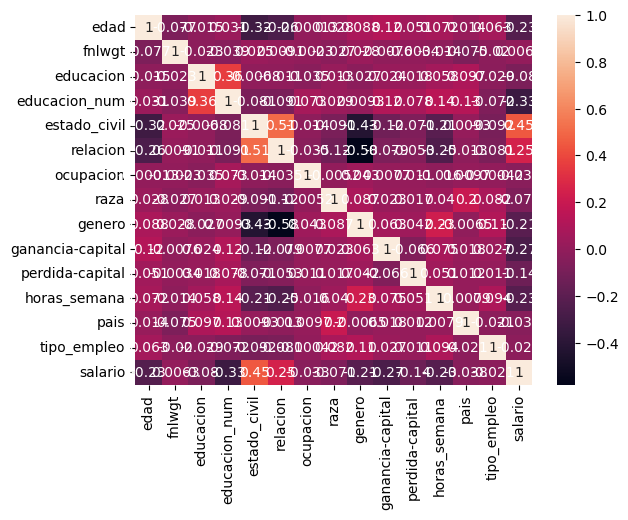

In [5]:
#Ver las relaciones de las etiquetas
sns.heatmap(df.corr(), annot=True)

In [6]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(['salario'], axis=1)
y = df['salario']

In [7]:
y=df['salario']
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    0
Name: salario, Length: 48842, dtype: int64

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [9]:
# Escalar las características utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
# Realizar predicciones con regresión logística
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [12]:
# Evaluar el modelo de regresión logística
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
confusion_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)

<Axes: >

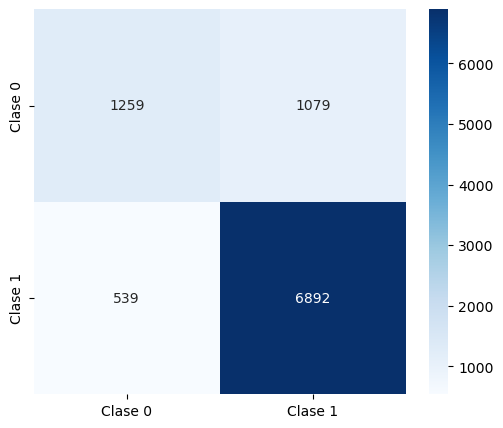

In [13]:
# Modelo de matriz de confusión de regresión logística
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat_log_reg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])


In [14]:
# Evaluación del modelo de regresión logística
print("Classification Report for Logistic Regression:")
print(classification_rep_log_reg)
print('Train Accuracy : %.5f' % log_reg.score(X_train_scaled, y_train))
print('Test Accuracy : %.5f' % log_reg.score(X_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      2338
           1       0.86      0.93      0.89      7431

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.83      0.83      0.83      9769

Train Accuracy : 0.83454
Test Accuracy : 0.83437
Precisión del modelo: 0.8343740403316614
